In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
#1 โหลด Dataset เข้าไปใน Python Pandas
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [53]:
#2 เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [54]:
df.tail(10)

,Review,Liked
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [55]:
df.sample(10)

,Review,Liked
428,"Strike 2, who wants to be rushed.",0
277,The goat taco didn't skimp on the meat and wow...,1
539,The steak and the shrimp are in my opinion the...,1
208,Must have been an off night at this place.,0
881,"The service was terrible, food was mediocre.",0
790,When I received my Pita it was huge it did hav...,1
918,They brought a fresh batch of fries and I was ...,0
43,"On a positive note, our server was very attent...",1
317,"Back to good BBQ, lighter fare, reasonable pri...",1
163,Avoid at all cost!,0


In [56]:
#3 ใช้ info และ describe อธิบายข้อมูลเบื้องต้น
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [57]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


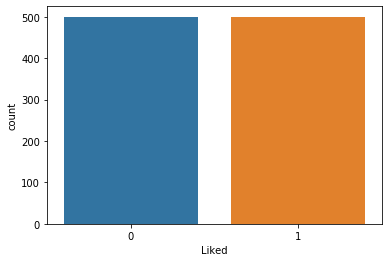

In [58]:
#4 สร้าง countplot ของ Liked
sns.countplot(df['Liked'])

In [59]:
#5 หาความยาวของ Review ในแต่ละแถวแล้วเพิ่มเป็นคอลัมน์ใหม่
df['Review'].apply(len)

0       24
1       18
2       41
3       87
4       59
      ... 
995     66
996     24
997     50
998     91
999    134
Name: Review, Length: 1000, dtype: int64

In [60]:
df['Length'] = df['Review'].apply(len)
df

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


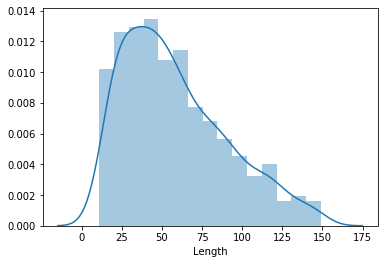

In [61]:
#6 หา histogram ของความยาวของ text ทั้งหมด
sns.distplot(df['Length'])

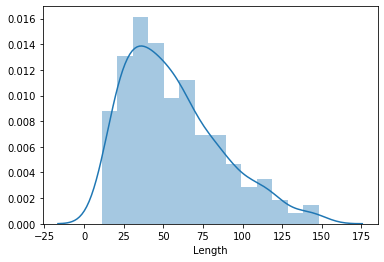

In [62]:
#7 หา histogram ของความยาวของ text แบ่งตาม Liked 
sns.distplot(df[df['Liked']==1]['Length'])

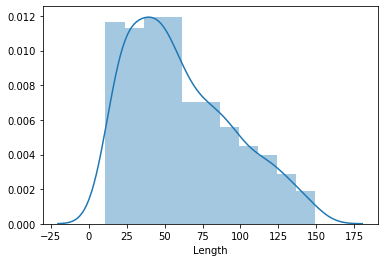

In [63]:
sns.distplot(df[df['Liked']==0]['Length'])

In [64]:
#8 แสดงรีวิวเต็มของรีวิวที่ยาวที่สุด
df['Length'].max()

149

In [65]:
df[df["Length"]==149]['Review'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [66]:
#9 หาความยาวของ Review เฉลี่ยต่อชนิดของ Liked
df.groupby('Liked').mean()

,Length
Liked,
0,60.75
1,55.88


In [67]:
#10 ปริ้น Review 10 อันแรกที่คนชอบ และ ปริ้น Review 10 อันแรกที่คนไม่ชอบ โดยใช้ For Loop 
for i in range(10):
    print('\n', df[df['Liked']==0]['Review'].iloc[i])


 Crust is not good.

 Not tasty and the texture was just nasty.

 Now I am getting angry and I want my damn pho.

 Honeslty it didn't taste THAT fresh.)

 The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.

 Would not go back.

 The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.

 I was disgusted because I was pretty sure that was human hair.

 I was shocked because no signs indicate cash only.

 Waitress was a little slow in service.


In [68]:
#11 เขียนฟังก์ชั่นรวมที่ ลบ punctuation และ ลบ stopwords
import string
from nltk.corpus import stopwords

In [69]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [70]:
import nltk

In [71]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
import string
from nltk.corpus import stopwords

In [73]:
def text_process(review_txt):
    no_punc = [x for x in review_txt if x not in string.punctuation]
    no_punc = ''.join(no_punc)
    txt = [y for y in no_punc.split() if y.lower() not in stopwords.words('english')]
    return txt

In [74]:
df['Review'].head(10).apply(text_process)

0                                  [Wow, Loved, place]
1                                        [Crust, good]
2                              [tasty, texture, nasty]
3    [Stopped, late, May, bank, holiday, Rick, Stev...
4                     [selection, menu, great, prices]
5                    [getting, angry, want, damn, pho]
6                      [Honeslty, didnt, taste, fresh]
7    [potatoes, like, rubber, could, tell, made, ah...
8                                       [fries, great]
9                                       [great, touch]
Name: Review, dtype: object

In [75]:
#12 ทำ Bag-Of-Words โดยใช้ Analyzer เป็น ฟังก์ชั่นที่ลบ punctuation และ ลบ stopwords
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Review'])

In [76]:
#13 มี Vocabulary กี่คำใน Corpus หลังจากทำ BOW
len(bow_transformer.vocabulary_)

2159

In [77]:
#14 ขนาดของ Sparse Matrix เป็นเท่าใดหลังจากทำ BOW
bow_review = bow_transformer.transform(df['Review'])
bow_review

<1000x2159 sparse matrix of type '<class 'numpy.int64'>'
	with 5606 stored elements in Compressed Sparse Row format>

In [78]:
#15 หา % ของ Sparsity
bow_review.nnz

5606

In [79]:
bow_review.shape[0]

1000

In [80]:
bow_review.shape[1]

2159

In [81]:
print('% of sparsity =', (bow_review.nnz *100)/(bow_review.shape[0]*bow_review.shape[1]))

% of sparsity = 0.25965724872626217


In [82]:
#16 ทำ TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(bow_review)

In [83]:
tfidf_review = tfidf_transformer.transform(bow_review)
tfidf_review

<1000x2159 sparse matrix of type '<class 'numpy.float64'>'
	with 5606 stored elements in Compressed Sparse Row format>

In [84]:
#17 สร้าง Classifier ด้วย MultinomialNB
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [85]:
X = tfidf_review
y = df['Liked']

In [86]:
model = nb.fit(X,y)

In [87]:
predicted = model.predict(X)

In [88]:
#18 ทำนายผล และสร้าง Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
confusion_matrix(y, predicted)

array([[486,  14],
       [ 21, 479]], dtype=int64)

In [89]:
#19 ทดสอบวัดผลด้วย Training Data และประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision
print('Accuracy: ', accuracy_score(y, predicted))
print('F1 score: ', f1_score(y, predicted))
print('Recall: ', recall_score(y, predicted))
print('Precision: ', precision_score(y, predicted))

Accuracy:  0.965
F1 score:  0.9647532729103725
Recall:  0.958
Precision:  0.9716024340770791


In [90]:
#20 สร้าง Classifier ด้วย GaussianNB
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model2 = nb.fit(X.todense(),y)

In [91]:
predicted = model2.predict(X.todense())

In [92]:
#21 ทำนายผล และสร้าง Confusion Matrix
confusion_matrix(y, predicted)

array([[456,  44],
       [  0, 500]], dtype=int64)

In [93]:
#22 ทดสอบวัดผลด้วย Training Data และประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision
print('Accuracy: ', accuracy_score(y, predicted))
print('F1 score: ', f1_score(y, predicted))
print('Recall: ', recall_score(y, predicted))
print('Precision: ', precision_score(y, predicted))

Accuracy:  0.956
F1 score:  0.9578544061302682
Recall:  1.0
Precision:  0.9191176470588235


In [94]:
#23 Split data ด้วยอัตราส่วน 0.2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Liked'], test_size=0.2, random_state=35)

In [95]:
#24 สร้าง Data Pipeline
from sklearn.pipeline import Pipeline

In [96]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [97]:
#25 ทำนายผล และสร้าง Confusion Matrix
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001E995F08C80>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [98]:
predicted = pipeline.predict(X_test)

In [99]:
confusion_matrix(y_test, predicted)

array([[67, 38],
       [15, 80]], dtype=int64)

In [100]:
#26 ทดสอบวัดผลด้วย Testing Data และประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision
print('Accuracy: ', accuracy_score(y_test, predicted))
print('F1 score: ', f1_score(y_test, predicted))
print('Recall: ', recall_score(y_test, predicted))
print('Precision: ', precision_score(y_test, predicted))

Accuracy:  0.735
F1 score:  0.7511737089201876
Recall:  0.8421052631578947
Precision:  0.6779661016949152
